Import Necessary Libraries

In [39]:
from keras.preprocessing.text import Tokenizer
import spacy
import numpy as np
import re
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense , Embedding ,LSTM
import matplotlib.pyplot as plt


Open file as list


In [8]:
with open('jokes.txt' , 'r' , errors='ignore' ) as file:
  a = file.readlines()
data = [item.strip() for item in a]

Changing the capital letters to lowercase


In [9]:
data_lower = []
for dat in data:
    data_lower.append(dat.lower())

Contractions Dictionary


In [10]:
contractions_dict = {
    "i'm": "i am",
    "i've": "i have",
    "i'll": "i will",
    "you're": "you are",
    "you've": "you have",
    "you'll": "you will",
    "he's": "he is",
    "he'll": "he will",
    "she's": "she is",
    "she'll": "she will",
    "it's": "it is",
    "we're": "we are",
    "we've": "we have",
    "we'll": "we will",
    "they're": "they are",
    "they've": "they have",
    "they'll": "they will",
    "can't": "cannot",
    "won't": "will not",
    "isn't": "is not"
}

In [11]:
data_lower[:5]

['did you hear about the fire at the shoe factory? unfortunately, many soles were lost.',
 'what do you call a pig who knows how to use a knife? a pork chop.',
 'what kind of fish knows how to do an appendectomy? a sturgeon.',
 'how do you hire a horse? put up a ladder.',
 'why did the pony ask for a glass of water? because it was a little horse.',
 "is there anything worse than when it's raining cats and dogs? yes, hailing taxis.",
 'how many apples can you grow on a tree? all of them.',
 "my manager told me to have a good day. so i didn't go into work.",
 'what do kids play when they have nothing else to do? bored games.',
 "what did the boy say to his fingers? i'm counting on you."]

Tokenize the words and remove any punctuation marks and symbol

In [12]:
words = []
data_purified = []
for low in data_lower:
  a = re.split('[,\-!\s.?\n]+' , low)
  container = []
  data_purified.append(' '.join(a))
  for any in a:
    if any != '':
      if any in contractions_dict:
        any = contractions_dict[any]
        val = any.split()
        for i in val:
          words.append(i)
          container.append(i)
      words.append(any)
      container.append(any)
  data_purified.append(' '.join(container))


In [13]:
data_purified[:10]

['did you hear about the fire at the shoe factory unfortunately many soles were lost ',
 'did you hear about the fire at the shoe factory unfortunately many soles were lost',
 'what do you call a pig who knows how to use a knife a pork chop ',
 'what do you call a pig who knows how to use a knife a pork chop',
 'what kind of fish knows how to do an appendectomy a sturgeon ',
 'what kind of fish knows how to do an appendectomy a sturgeon',
 'how do you hire a horse put up a ladder ',
 'how do you hire a horse put up a ladder',
 'why did the pony ask for a glass of water because it was a little horse ',
 'why did the pony ask for a glass of water because it was a little horse']

In [14]:
tokenizer = Tokenizer()

In [15]:
tokenizer.fit_on_texts(words)

In [16]:
x_seq = []
for tex in data_purified:
    encoded_tex= tokenizer.texts_to_sequences([tex])[0]
    for i in range(1,len(encoded_tex)):
      x_seq.append(encoded_tex[:i+1])

In [17]:
max_length = max([len(x) for x in x_seq])

In [18]:
padded_x_seq = pad_sequences(x_seq , maxlen=max_length , padding='pre')

In [19]:
padded_x_seq

array([[  0,   0,   0, ...,   0,  10,   5],
       [  0,   0,   0, ...,  10,   5,  38],
       [  0,   0,   0, ...,   5,  38,  28],
       ...,
       [  0,   0,   0, ..., 121,   3,  22],
       [  0,   0,   0, ...,   3,  22, 370],
       [  0,   0,   0, ...,  22, 370, 174]], dtype=int32)

In [20]:
X_train = padded_x_seq[: , :-1]

In [21]:
y_ = padded_x_seq[: , -1]

Total Number of Unique words


In [22]:
length = len(tokenizer.word_index)

Encoding words

In [23]:
y_train = to_categorical(y_ , num_classes=(length+1))

Building the model

In [34]:
model =Sequential()
model.add(Embedding((length+1) , 100 , input_length =(max_length-1)))
model.add(LSTM(90))
model.add(Dense((length+1) , activation = 'softmax'))

In [35]:
model.compile(loss = 'categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 100)           215100    
                                                                 
 lstm_1 (LSTM)               (None, 90)                68760     
                                                                 
 dense_1 (Dense)             (None, 2151)              195741    
                                                                 
Total params: 479601 (1.83 MB)
Trainable params: 479601 (1.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Training the model

In [37]:
history =model.fit(X_train , y_train , epochs= 50)

Epoch 1/50
504/504 [==============================] - 26s 47ms/step - loss: 6.4327 - accuracy: 0.0493
Epoch 2/50
504/504 [==============================] - 24s 48ms/step - loss: 5.8831 - accuracy: 0.0693
Epoch 3/50
504/504 [==============================] - 22s 44ms/step - loss: 5.4961 - accuracy: 0.1051
Epoch 4/50
504/504 [==============================] - 23s 46ms/step - loss: 5.1059 - accuracy: 0.1390
Epoch 5/50
504/504 [==============================] - 24s 47ms/step - loss: 4.7241 - accuracy: 0.1774
Epoch 6/50
504/504 [==============================] - 23s 46ms/step - loss: 4.3603 - accuracy: 0.2096
Epoch 7/50
504/504 [==============================] - 23s 46ms/step - loss: 4.0149 - accuracy: 0.2461
Epoch 8/50
504/504 [==============================] - 22s 44ms/step - loss: 3.6914 - accuracy: 0.2796
Epoch 9/50
504/504 [==============================] - 23s 45ms/step - loss: 3.3856 - accuracy: 0.3216
Epoch 10/50
504/504 [==============================] - 23s 46ms/step - loss: 3.089

Text(0, 0.5, 'Value')

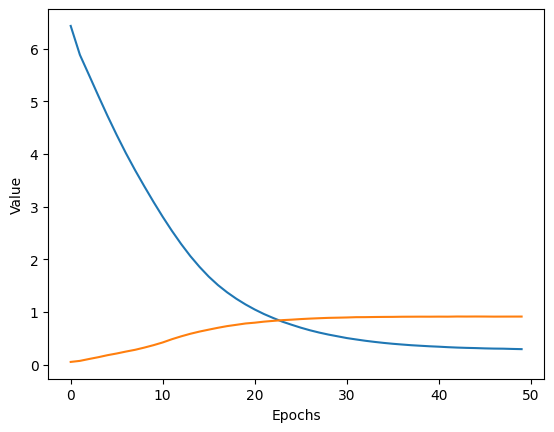

In [41]:
plt.plot(history.history['loss'] ,label='Loss' )
plt.plot(history.history['accuracy'] , label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')

In [45]:
import time
text_p = 'what did she said \n'
for i in range(7):
  int_text = tokenizer.texts_to_sequences([text_p])[0]
  pad_text = pad_sequences([int_text] , maxlen=max_length-1 , padding='pre')
  pos = np.argmax(model.predict(pad_text))
  for word,index in tokenizer.word_index.items():
    if index == pos:
      text_p = text_p + " " + word
      print(text_p)
      time.sleep(2)

1/1 [==============================] - 0s 38ms/step
what did she said 
 i
1/1 [==============================] - 0s 31ms/step
what did she said 
 i wont
1/1 [==============================] - 0s 21ms/step
what did she said 
 i wont be
1/1 [==============================] - 0s 24ms/step
what did she said 
 i wont be able
1/1 [==============================] - 0s 23ms/step
what did she said 
 i wont be able to
1/1 [==============================] - 0s 21ms/step
what did she said 
 i wont be able to make
1/1 [==============================] - 0s 22ms/step
what did she said 
 i wont be able to make it
